## Flight delay Predictions
#### Contents
- **Data verification and Statistical Analysis**
- **Exploratory Data Analysis**
- **Data preprocessing**
- **Model building and Evaluation**
- **Productionizing**

### Import Libraries

In [1]:
# importing Libraries

# for Data Analysis
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for data pre processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier



!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
# Load dataset
d1 = pd.read_csv(r"C:\Users\akann\Documents\10ALYTICS\CASE STUDIES\PYTHON- PROJECTS\MACHINE LEARNING\SUPERVISED ML\FLIGHT DELAY PREDICTION\flights.csv")
d1.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning and Verification

In [3]:
#Dropping rows with missing values
d1.drop(['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis=1, inplace=True)
d1.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0


In [4]:
# Load airline data
dff= pd.read_csv(r"C:\Users\akann\Documents\10ALYTICS\CASE STUDIES\PYTHON- PROJECTS\MACHINE LEARNING\SUPERVISED ML\FLIGHT DELAY PREDICTION\airlines.csv")
dff

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [5]:
dff = dff.rename(columns={'AIRLINE': 'ARL'})
dff

,IATA_CODE,ARL
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [6]:
# Load airpot data
dfg= pd.read_csv(r"C:\Users\akann\Documents\10ALYTICS\CASE STUDIES\PYTHON- PROJECTS\MACHINE LEARNING\SUPERVISED ML\FLIGHT DELAY PREDICTION\airports.csv")
dfg

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [7]:
# joining tables
d3 = pd.merge(d1, dff, left_on='AIRLINE', right_on='IATA_CODE', how='inner')
d4 = pd.merge(d3, dfg, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
d44 = pd.DataFrame(d4)
d44.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,CANCELLED,IATA_CODE_x,ARL,IATA_CODE_y,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,AS,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,...,0,AS,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
2,2015,1,1,4,AS,122,N413AS,ANC,PDX,50,...,0,AS,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
3,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,...,1,AS,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
4,2015,1,1,4,AS,134,N464AS,ANC,SEA,155,...,0,AS,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


In [8]:
# Data verification: Data types, number of features and rows.
d44.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 34 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1048575 non-null  int64  
 1   MONTH                1048575 non-null  int64  
 2   DAY                  1048575 non-null  int64  
 3   DAY_OF_WEEK          1048575 non-null  int64  
 4   AIRLINE              1048575 non-null  object 
 5   FLIGHT_NUMBER        1048575 non-null  int64  
 6   TAIL_NUMBER          1040825 non-null  object 
 7   ORIGIN_AIRPORT       1048575 non-null  object 
 8   DESTINATION_AIRPORT  1048575 non-null  object 
 9   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 10  DEPARTURE_TIME       1009060 non-null  float64
 11  DEPARTURE_DELAY      1009060 non-null  float64
 12  TAXI_OUT             1008346 non-null  float64
 13  WHEELS_OFF           1008346 non-null  float64
 14  SCHEDULED_TIME       1048573 non-null  float64
 15

In [9]:
# checking for missing values
print(d44.isnull().sum())

# visualizing missing values
#plt.figure(figsize=(10,3))
#sns.heatmap(df.isnull(), cbar= True, cmap="Blues_r")

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER             7750
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME         39515
DEPARTURE_DELAY        39515
TAXI_OUT               40229
WHEELS_OFF             40229
SCHEDULED_TIME             2
ELAPSED_TIME           43071
AIR_TIME               43071
DISTANCE                   0
WHEELS_ON              41296
TAXI_IN                41296
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME           41296
ARRIVAL_DELAY          43071
DIVERTED                   0
CANCELLED                  0
IATA_CODE_x                0
ARL                        0
IATA_CODE_y                0
AIRPORT                    0
CITY                       0
STATE                      0
COUNTRY                    0
LATITUDE                 649
LONGITUDE                649
dtype: int64


In [10]:
# drop missing values
d5 = d44.dropna()

In [11]:
# Duplicate dataset
dfc = d5.copy()

In [12]:
# Remove outliers for departure delay

Q1_departure = d5['DEPARTURE_DELAY'].quantile(0.25)
Q3_departure = d5['DEPARTURE_DELAY'].quantile(0.75)
IQR_departure = Q3_departure - Q1_departure

# Keep only data points within 1.5 times IQR from Q1 and Q3 for departure delay

flights_data_no_outliers_departure = d5[(d5['DEPARTURE_DELAY'] >= Q1_departure - 1.5 * IQR_departure) & (d5['DEPARTURE_DELAY'] <= Q3_departure + 1.5 * IQR_departure)]

# Remove outliers for arrival delay

Q1_arrival = d5['ARRIVAL_DELAY'].quantile(0.25)
Q3_arrival = d5['ARRIVAL_DELAY'].quantile(0.75)
IQR_arrival = Q3_arrival - Q1_arrival

# Keep only data points within 1.5 times IQR from Q1 and Q3 for arrival delay

flights_data_no_outliers_arrival = d5[(d5['ARRIVAL_DELAY'] >= Q1_arrival - 1.5 * IQR_arrival) & (d5['ARRIVAL_DELAY'] <= Q3_arrival + 1.5 * IQR_arrival)]

# Combine the results into a single DataFrame

df = pd.concat([flights_data_no_outliers_departure, flights_data_no_outliers_arrival]).drop_duplicates()

# Display the shape of the new DataFrame without outliers
#print("Shape of DataFrame without outliers for both departure and arrival delay:", flights_data_no_outliers.shape)

In [13]:
# checking for unique years
month = df['MONTH'].unique()
print('unique MONTH:', month)

unique MONTH: [1 2 3]


### Statistical analysis

In [14]:
# Create a new DataFrame with rows where DEPARTURE_DELAY > 0 and ARRIVAL_DELAY > 0
filtered_df = df[(df['DEPARTURE_DELAY'] > 0) & (df['ARRIVAL_DELAY'] > 0)]

filtered_df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,LATITUDE,LONGITUDE
count,229813.0,229813.000000,229813.000000,229813.000000,229813.000000,229813.000000,229813.000000,229813.000000,229813.000000,229813.000000,...,229813.000000,229813.000000,229813.000000,229813.000000,229813.000000,229813.000000,229813.0,229813.0,229813.000000,229813.000000
mean,2015.0,1.735689,12.913826,3.963144,2194.219357,1432.384500,1459.008133,19.857436,17.971742,1485.205693,...,805.496617,1607.109380,7.725246,1610.445314,1609.122504,19.623089,0.0,0.0,36.226114,-95.283075
std,0.0,0.717684,8.656793,2.022769,1765.769087,436.179288,443.218309,14.637046,11.503076,443.520905,...,584.200284,487.167706,6.854565,466.406734,496.431624,15.541873,0.0,0.0,5.838006,17.792561
min,2015.0,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,13.483450,-176.646030
25%,2015.0,1.000000,5.000000,2.000000,743.000000,1105.000000,1122.000000,8.000000,11.000000,1139.000000,...,370.000000,1305.000000,4.000000,1301.000000,1308.000000,8.000000,0.0,0.0,32.895950,-106.609190
50%,2015.0,2.000000,12.000000,4.000000,1658.000000,1445.000000,1504.000000,17.000000,15.000000,1519.000000,...,651.000000,1651.000000,6.000000,1646.000000,1655.000000,16.000000,0.0,0.0,36.080360,-90.359990
75%,2015.0,2.000000,20.000000,6.000000,3378.000000,1800.000000,1820.000000,29.000000,21.000000,1837.000000,...,1050.000000,2006.000000,9.000000,2003.000000,2011.000000,29.000000,0.0,0.0,40.692500,-81.755170
max,2015.0,3.000000,31.000000,7.000000,9320.000000,2359.000000,2400.000000,112.000000,179.000000,2400.000000,...,4983.000000,2400.000000,197.000000,2359.000000,2400.000000,243.000000,0.0,0.0,71.285450,-64.798560


## Exploratory Data Analysis

### Univariate Analysis

**Analysis of Arrival and Departure Delays**

In [15]:
# Filter only positive delays for arrival and departure flights
df_depart_delays = df[df['DEPARTURE_DELAY'] > 0]
df_arriv_delays = df[df['ARRIVAL_DELAY'] > 0]
#df_all_delays = 

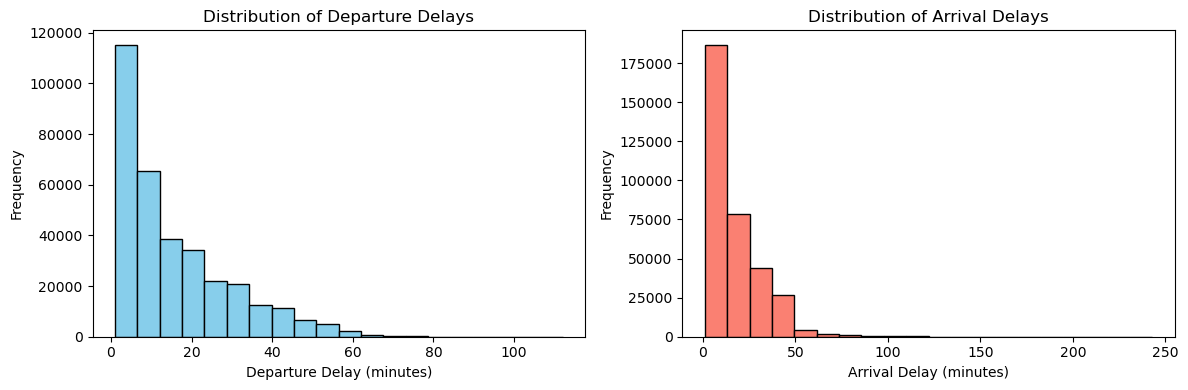

In [16]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot histogram for Departure Delays
axs[0].hist(df_depart_delays['DEPARTURE_DELAY'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Departure Delays')
axs[0].set_xlabel('Departure Delay (minutes)')
axs[0].set_ylabel('Frequency')

# Plot histogram for Arrival Delays
axs[1].hist(df_arriv_delays['ARRIVAL_DELAY'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Distribution of Arrival Delays')
axs[1].set_xlabel('Arrival Delay (minutes)')
axs[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

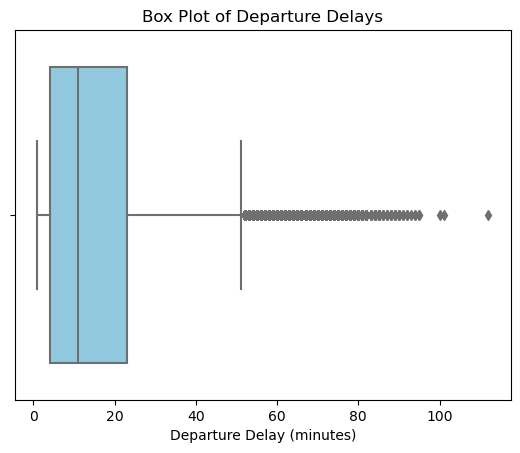

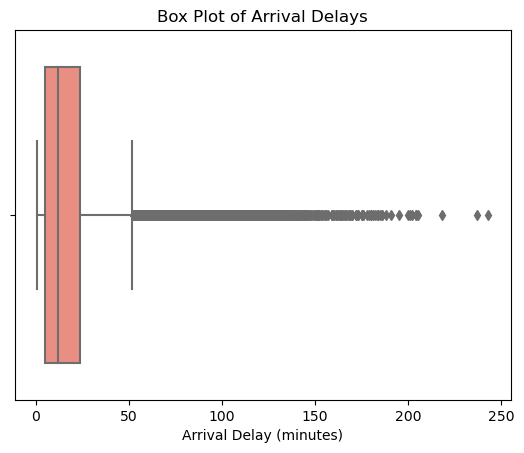

In [17]:
# Box plot for Departure Delays
sns.boxplot(x='DEPARTURE_DELAY', data=df_depart_delays, color='skyblue')
plt.title('Box Plot of Departure Delays')
plt.xlabel('Departure Delay (minutes)')

# Show the plot
plt.show()


# Box plot for Arrival Delays
sns.boxplot(x='ARRIVAL_DELAY', data=df_arriv_delays, color='salmon')
plt.title('Box Plot of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')

# Show the plot
plt.show()

**Narration**
- **Departure delay is right skewed with a minimum delay of 1 minute and a maximum delay of 112 mins. The mean delay is 19.86mins**
- **Arrival delay is right skewed with a minimum delay of 1 minute and a maximum delay of 243mins. The mean delay is 19.62 mins**

**Analysis of number of flights per airline.**

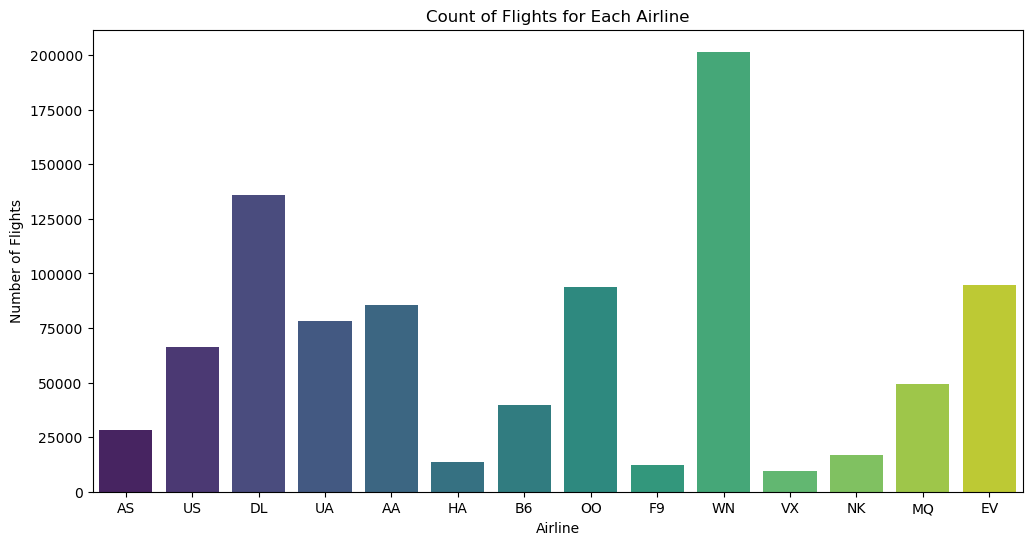

In [18]:
# Create a bar chart for the count of flights for each airline
plt.figure(figsize=(12, 6))
sns.countplot(x='AIRLINE', data=df, palette='viridis')
plt.title('Count of Flights for Each Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')

# Show the plot
plt.show()

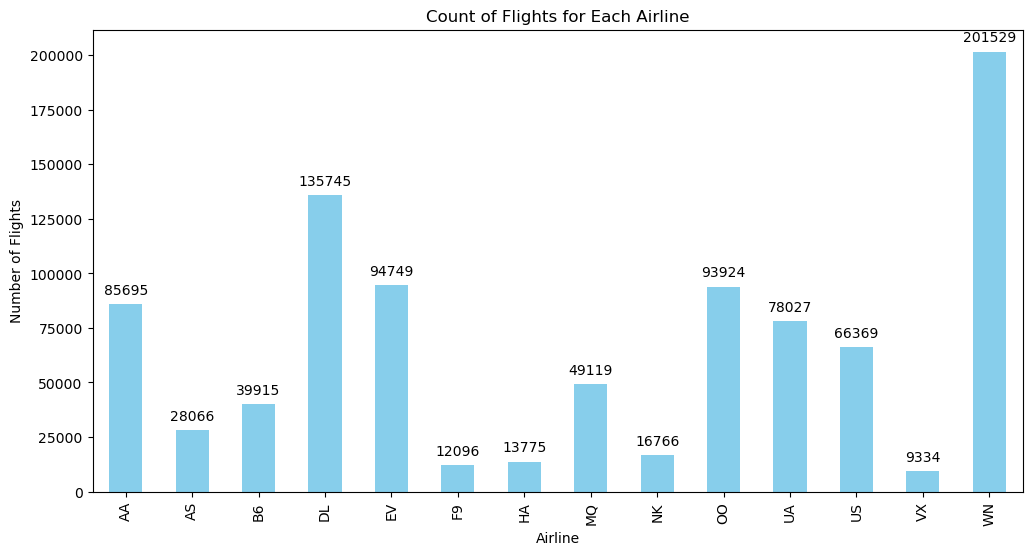

In [19]:
# Create a bar chart for the count of flights for each airline with count numbers on top
plt.figure(figsize=(12, 6))
ax = df['AIRLINE'].value_counts().sort_index().plot(kind='bar', color='skyblue')

# Add count numbers on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Count of Flights for Each Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')

# Show the plot
plt.show()

**Narration:**

**Top 3 Airlines with the highest number of flights**
- Southwest Airlines Co.(WN) - 201,529
- Delta Air Lines Inc (DL) - 135,745
- Atlantic Southeast Airlines (EV) - 94,749

### Bivariate Analysis

#### Analysis of Departure Delay by Airlines

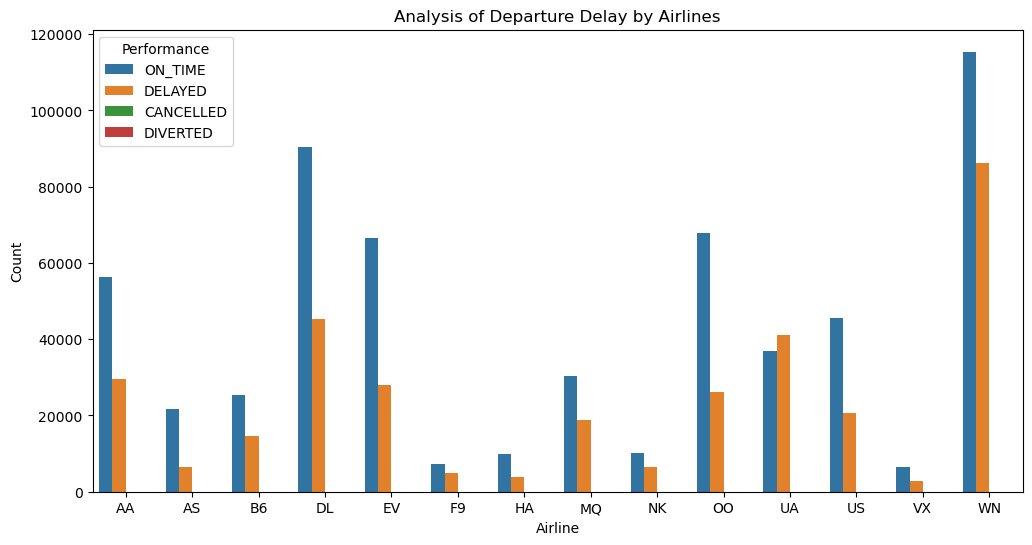

In [20]:
# Create a new DataFrame for on-time performance
on_time_df = df[['AIRLINE', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'CANCELLED', 'DIVERTED']]

# Define on-time, delayed, canceled, and diverted flights
#on_time_df['ON_TIME'] = ((on_time_df['DEPARTURE_DELAY'] <= 0) & (on_time_df['ARRIVAL_DELAY'] <= 0) & (on_time_df['CANCELLED'] == 0) & (on_time_df['DIVERTED'] == 0)).astype(int)
#on_time_df['DELAYED'] = ((on_time_df['DEPARTURE_DELAY'] > 0) | (on_time_df['ARRIVAL_DELAY'] > 0)).astype(int)

# # Define on-time, delayed for DEPARTURE FLIGHTS
on_time_df['ON_TIME'] = (on_time_df['DEPARTURE_DELAY'] <= 0) & (on_time_df['CANCELLED'] == 0) & (on_time_df['DIVERTED'] == 0)
on_time_df['DELAYED'] = (on_time_df['DEPARTURE_DELAY'] > 0)

# Group by airline and calculate the counts
performance_counts = on_time_df.groupby('AIRLINE').agg({'ON_TIME': 'sum', 'DELAYED': 'sum', 'CANCELLED': 'sum', 'DIVERTED': 'sum'}).reset_index()

# Melt the DataFrame for better visualization
performance_melted = pd.melt(performance_counts, id_vars='AIRLINE', var_name='Performance', value_name='Count')

# Plot a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='AIRLINE', y='Count', hue='Performance', data=performance_melted)
plt.title('Analysis of Departure Delay by Airlines')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.show()

In [21]:
# Departure Delays
departure_delays = df[df['DEPARTURE_DELAY'] > 0]  # Filter only delayed departures
top_departure_airlines = departure_delays.groupby('AIRLINE')['DEPARTURE_DELAY'].mean().sort_values().head(3).reset_index()

# Arrival Delays
arrival_delays = df[df['ARRIVAL_DELAY'] > 0]  # Filter only delayed arrivals
top_arrival_airlines = arrival_delays.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().sort_values().head(3).reset_index()

# Display the results
print("Top 3 Airlines with the Lowest Departure Delays:")
print(top_departure_airlines)

print("\nTop 3 Airlines with the Lowest Arrival Delays:")
print(top_arrival_airlines)


Top 3 Airlines with the Lowest Departure Delays:
  AIRLINE  DEPARTURE_DELAY
0      HA        10.332824
1      AS        13.984816
2      DL        14.284383

Top 3 Airlines with the Lowest Arrival Delays:
  AIRLINE  ARRIVAL_DELAY
0      HA      11.407919
1      AS      13.553850
2      VX      15.185590


**Narration:**

**Top 3 Airlines with the lowest delay rates for Departure Flights**
- Hawaiian Airlines Inc.(HA) - 10.33 mins
- Alaska Airlines Inc.(AS)- 13.98 mins
- Delta Air Lines Inc.(DL)- 14.28 mins

**Top 3 Airlines with the lowest delay rates for Arrival Flights**
- Hawaiian Airlines Inc.(HA) - 11.40 mins
- Alaska Airlines Inc.(AS)- 13.55 mins
- Virgin America(VX)- 15.19 mins

#### Analysis of Departure Delay by Day of the Week

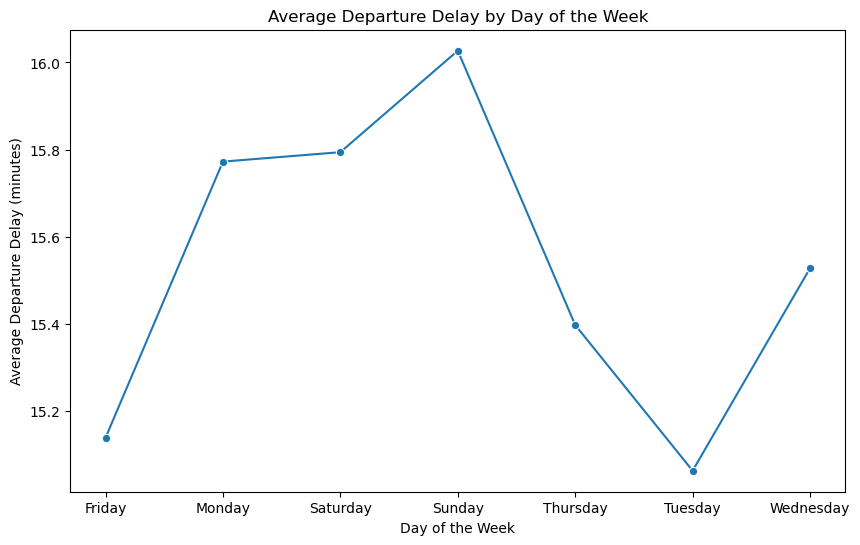

In [22]:
def d_o_w(DAY_OF_WEEK):
    if DAY_OF_WEEK== 1:
        return 'Sunday'
    elif DAY_OF_WEEK==2 :
        return 'Monday'
    elif DAY_OF_WEEK==3 :
        return 'Tuesday'
    elif DAY_OF_WEEK==4 :
        return 'Wednesday'
    elif DAY_OF_WEEK==5 :
        return 'Thursday'
    elif DAY_OF_WEEK==6 :
        return 'Friday'
    else :
        return 'Saturday'
        
df['dayofweek'] =df['DAY_OF_WEEK'].apply(d_o_w)

# Filter only positive departure delays
df_positive_delays = df[df['DEPARTURE_DELAY'] > 0]

# Group data by day of the week and calculate the mean delay for each day
daily_delays = df_positive_delays.groupby('dayofweek')['DEPARTURE_DELAY'].mean()

# Plotting the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_delays.index, y=daily_delays.values, marker='o')
plt.title('Average Departure Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()

**Narration:**
- **The highest delay periods for departure flights occur over the weekends, particularly on Sunday and Saturday, with Sunday experiencing the most significant delays. Monday also sees elevated delays, but there is a notable decrease on Tuesday. Weekdays generally encounter minimal delays, with Tuesday being the day with the least delay occurrences.**

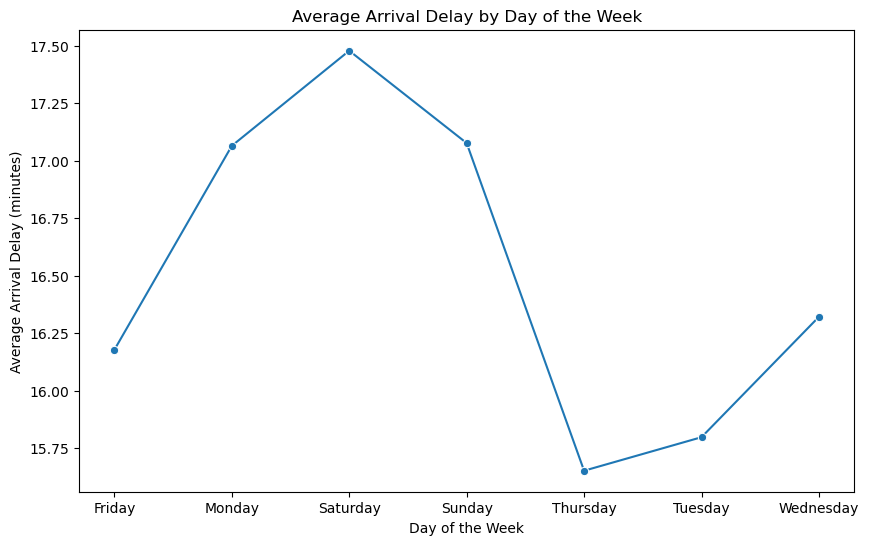

In [23]:
# Filter only positive Arrival delays
df_positive_delays = df[df['ARRIVAL_DELAY'] > 0]

# Group data by day of the week and calculate the mean delay for each day
daily_delays = df_positive_delays.groupby('dayofweek')['ARRIVAL_DELAY'].mean()

# Plotting the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_delays.index, y=daily_delays.values, marker='o')
plt.title('Average Arrival Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Arrival Delay (minutes)')
plt.show()

**Narration:**
- **The highest delay periods for Arrival flights occur over the weekends, particularly on Sunday and Saturday, with Saturday experiencing the most significant delays. Monday also sees elevated delays, but there is a notable decrease on Tuesday. Weekdays generally encounter minimal delays, with Thursday being the day with the least delay occurrences.**

#### Analysis of Airports with the highest delays

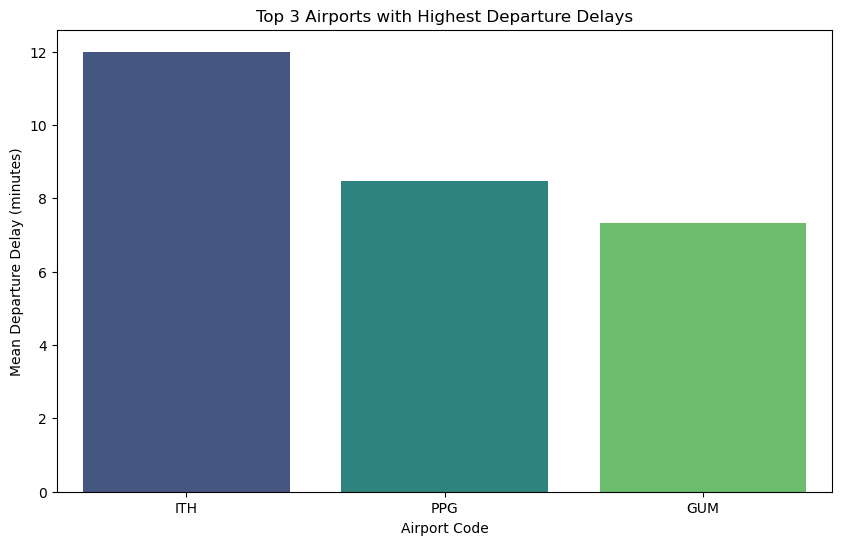

In [24]:
# Group by origin airport and calculate the mean departure delay for each airport
top_airports = df.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values(ascending=False).head(3)

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_airports.index, y=top_airports.values, palette='viridis')
plt.title('Top 3 Airports with Highest Departure Delays')
plt.xlabel('Airport Code')
plt.ylabel('Mean Departure Delay (minutes)')
plt.show()


### Multivariate Analysis
#### Airport Analysis

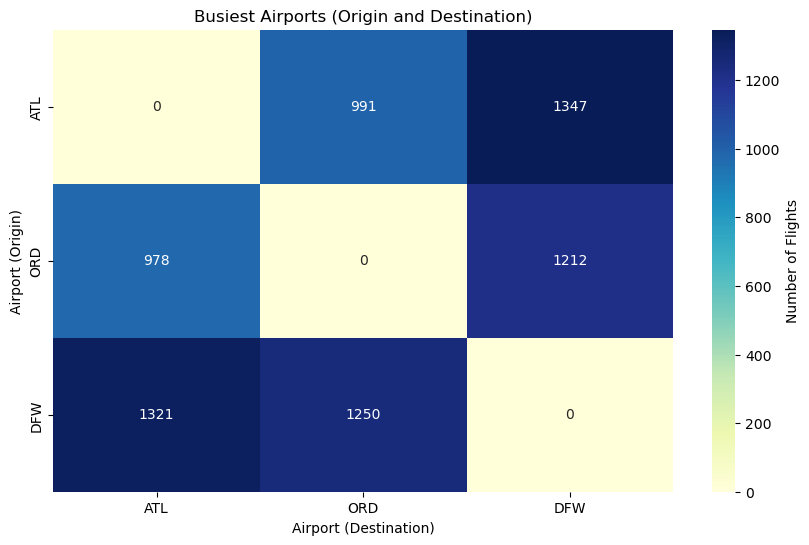

In [25]:
# Count the number of flights for each airport (both origin and destination)
origin_counts = df['ORIGIN_AIRPORT'].value_counts()
destination_counts = df['DESTINATION_AIRPORT'].value_counts()

# Combine the counts for both origin and destination
airport_counts = origin_counts.add(destination_counts, fill_value=0)

# Select the top N busiest airports (adjust N as needed)
top_airports = airport_counts.nlargest(3)

# Create a DataFrame for the heatmap
heatmap_data = pd.DataFrame(index=top_airports.index, columns=top_airports.index)

# Fill the DataFrame with the number of flights between each pair of airports
for origin in top_airports.index:
    for destination in top_airports.index:
        total_flights = len(df[(df['ORIGIN_AIRPORT'] == origin) & (df['DESTINATION_AIRPORT'] == destination)])
        heatmap_data.at[origin, destination] = total_flights

# Convert values to numeric using applymap
heatmap_data = heatmap_data.applymap(pd.to_numeric, errors='coerce')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Number of Flights'})
plt.title('Busiest Airports (Origin and Destination)')
plt.xlabel('Airport (Destination)')
plt.ylabel('Airport (Origin)')
plt.show()


**Narration:**

**Top 3 busiest airports(airports with the highest number of flights)**
- Hartsfield-Jackson Atlanta International Airport Atlanta Georgia - ATL
- Dallas/Fort Worth International Airport  Dallas-Fort Worth - DFW
- Chicago O'Hare International Airport  Chicago Ilinois - ORD

In [26]:
# Display specific rows
#atl_row = dfg.loc[dfg['IATA_CODE'] == 'AFTL']

# Print the row
#print(atl_row)

#### Correlation Heatmap

In [27]:
def delay(DEPARTURE_DELAY):
    if DEPARTURE_DELAY > 0:
        return 1
    else :
        return 0
df['departure_delays'] = df['DEPARTURE_DELAY'].apply(delay)

def delay2(ARRIVAL_DELAY):
    if ARRIVAL_DELAY > 0:
        return 1
    else :
        return 0
df['arrival_delays'] = df['ARRIVAL_DELAY'].apply(delay2)


In [28]:
# List of columns to drop
columns_to_drop = [
    'AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
    'IATA_CODE_x', 'ARL', 'IATA_CODE_y', 'AIRPORT', 'CITY', 'STATE',
    'COUNTRY', 'LATITUDE', 'LONGITUDE', 'dayofweek', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY','DIVERTED','CANCELLED','YEAR'
]

# Drop specified columns
dfm = df.drop(columns=columns_to_drop)


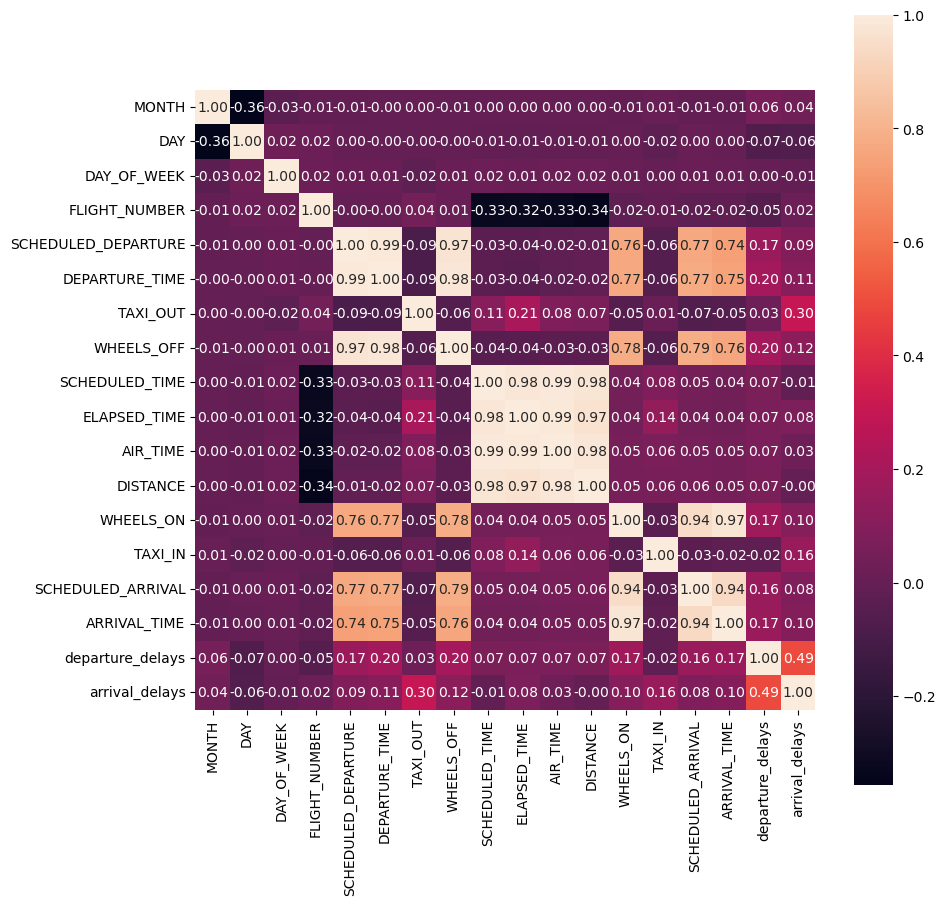

In [29]:
# Correlation Heat map
plt.figure(figsize=(10,10))
hm= sns.heatmap(dfm.corr(), cbar=True, annot=True, square= True, fmt='.2f', annot_kws= {'size': 10})

**Narration:**

## Data Pre-Processing and Model Building

### Departure delay Prediction

In [30]:
# segment data
label = dfm.pop('departure_delays')

In [31]:
# dropping redundant features for departure delays based on validity
# List of columns to drop
columns_to_drop = [
    'arrival_delays','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME','ARRIVAL_TIME','WHEELS_ON','TAXI_OUT','FLIGHT_NUMBER','AIR_TIME','TAXI_IN'
]

# Drop specified columns
dfd = dfm.drop(columns=columns_to_drop)


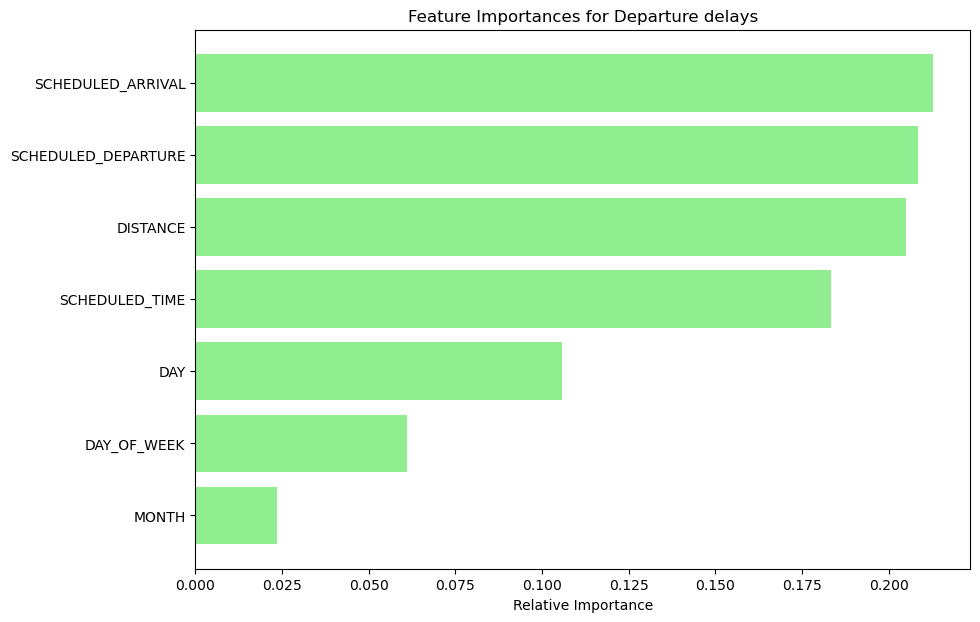

In [32]:
# plotting a feature importance chart for Departure delays to Identify key features from the data set

# Sample 5% of the data randomly
dfmP = dfd.sample(frac=0.05, random_state=42)
dfm5 = df.sample(frac=0.05, random_state=42)
labelP = dfm5.pop('departure_delays')


scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(dfmP,labelP)

# fit the model
model = RandomForestClassifier()
model.fit(df_scaled, labelP)
feature_names = list(dfmP.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.title("Feature Importances for Departure delays")
plt.barh(range(len(indices)), importances[indices], color='lightgreen', align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [33]:
# standardization of features using Standard Scaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(dfd),columns= dfd.columns)
scaled_df

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,-0.967341,-1.504550,0.015388,-2.771503,0.856811,1.069322,-2.193738
1,-0.967341,-1.504550,0.015388,-2.686616,0.843469,1.069322,-2.030884
2,-0.967341,-1.504550,0.015388,-2.676006,0.990233,1.226699,-1.997900
3,-0.967341,-1.504550,0.015388,-2.453179,1.030260,1.069322,-1.775263
4,-0.967341,-1.504550,0.015388,-2.357682,0.923522,1.226699,-1.781448
...,...,...,...,...,...,...,...
925104,1.881842,-1.273221,-0.995317,0.008526,0.523256,0.270718,0.249084
925105,1.881842,-1.273221,-0.995317,0.464791,0.523256,0.406330,0.692296
925106,1.881842,-1.041892,0.015388,1.154493,0.456544,0.270718,1.351961
925107,1.881842,-0.694898,1.531445,0.687617,-0.944389,-0.986622,0.517073


#### Split data into training and testing set

In [34]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df, label, test_size=0.3, random_state= 1)

In [35]:
# Instantiate Logistic Regression model
log_reg = LogisticRegression()

# Train model
log_reg.fit(x_train, y_train)

LogisticRegression()

In [36]:
# Model Prediction file
log_pred = log_reg.predict(x_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Precision:", precision_score(y_test, log_pred))
print("Recall:", recall_score(y_test, log_pred))
print("F1-score:", f1_score(y_test, log_pred))
print("AUC-ROC:", roc_auc_score(y_test, log_pred))

Logistic Regression
Accuracy: 0.6380358371797228
Precision: 0.5008593633238679
Recall: 0.1333791031113499
F1-score: 0.2106594796765854
AUC-ROC: 0.5289586584867035


In [37]:
# Instatiate Naive Bayes model
nb_model = GaussianNB()

# Train model
nb_model.fit(x_train, y_train)

GaussianNB()

In [38]:
# Model Prediction file - Naive Bayes
nb_pred = nb_model.predict(x_test)
print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Precision:", precision_score(y_test, nb_pred))
print("Recall:", recall_score(y_test, nb_pred))
print("F1-score:", f1_score(y_test, nb_pred))
print("AUC-ROC:", roc_auc_score(y_test, nb_pred))

Naive Bayes
Accuracy: 0.6244374542847156
Precision: 0.47075344400163177
Recall: 0.2985284021372496
F1-score: 0.3653622508935258
AUC-ROC: 0.5539950376499951


### Arrival delay Prediction

In [39]:
# segment data
label2 = dfm.pop('arrival_delays')

# Re-add departure_delays column
dfm['departure_delays'] = df['departure_delays']

In [40]:
# dropping redundant features for Arrival delays based on validity
# List of columns to drop
columns_to_drop = [
    'ELAPSED_TIME','ARRIVAL_TIME','WHEELS_ON','FLIGHT_NUMBER','AIR_TIME','TAXI_IN'
]

# Drop specified columns
dfa = dfm.drop(columns=columns_to_drop)


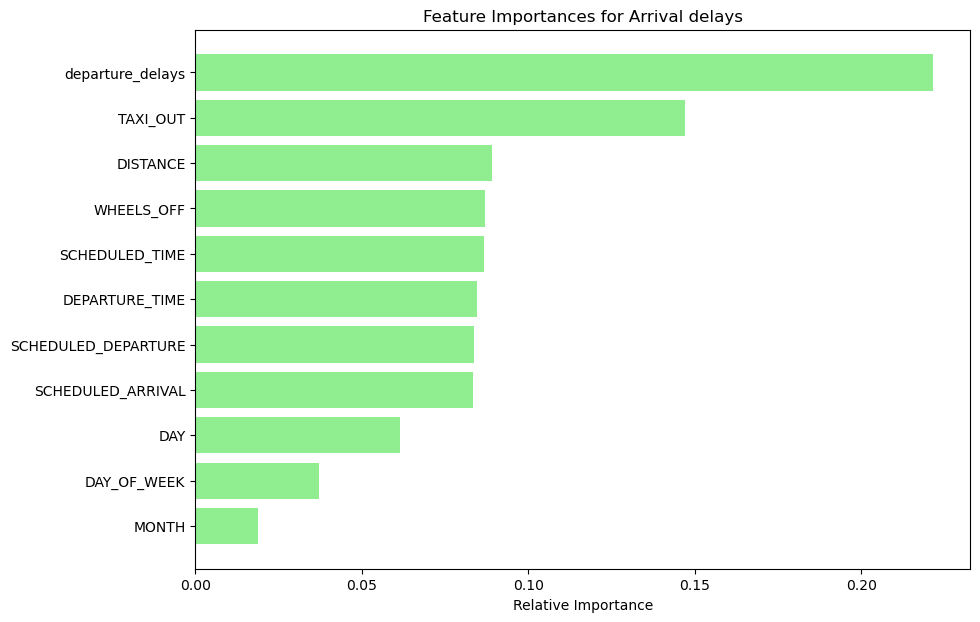

In [41]:
# plotting a feature importance chart for Arrival delays to Identify key features from the data set

# Sample 5% of the data randomly
dfmP = dfa.sample(frac=0.05, random_state=42)
dfm5 = df.sample(frac=0.05, random_state=42)
labelP = dfm5.pop('arrival_delays')


scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(dfmP,labelP)

# fit the model
model = RandomForestClassifier()
model.fit(df_scaled, labelP)
feature_names = list(dfmP.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.title("Feature Importances for Arrival delays")
plt.barh(range(len(indices)), importances[indices], color='lightgreen', align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [42]:
# standardization of features using Standard Scaler
scaler = StandardScaler()
scaled_df2 = pd.DataFrame(scaler.fit_transform(dfa),columns= dfa.columns)
scaled_df2

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,departure_delays
0,-0.967341,-1.504550,0.015388,-2.771503,2.183606,0.509208,-2.770287,0.856811,1.069322,-2.193738,-0.753411
1,-0.967341,-1.504550,0.015388,-2.686616,-2.661376,0.078537,-2.680107,0.843469,1.069322,-2.030884,-0.753411
2,-0.967341,-1.504550,0.015388,-2.676006,-2.650902,-0.567468,-2.682204,0.990233,1.226699,-1.997900,-0.753411
3,-0.967341,-1.504550,0.015388,-2.453179,-2.454003,0.078537,-2.472482,1.030260,1.069322,-1.775263,-0.753411
4,-0.967341,-1.504550,0.015388,-2.357682,-2.433056,0.832211,-2.352940,0.923522,1.226699,-1.781448,-0.753411
...,...,...,...,...,...,...,...,...,...,...,...
925104,1.881842,-1.273221,-0.995317,0.008526,0.095216,-0.998139,0.142755,0.523256,0.270718,0.249084,1.327297
925105,1.881842,-1.273221,-0.995317,0.464791,0.654494,-0.782804,0.623019,0.523256,0.406330,0.692296,1.327297
925106,1.881842,-1.041892,0.015388,1.154493,1.297559,-0.675136,1.268964,0.456544,0.270718,1.351961,1.327297
925107,1.881842,-0.694898,1.531445,0.687617,0.855583,-0.567468,0.828547,-0.944389,-0.986622,0.517073,1.327297


#### Split data into training and testing set

In [43]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df2, label2, test_size=0.3, random_state= 1)

In [44]:
# Instatiate model- DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

# Training model
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [45]:
# Model Prediction file - DecisionTreeClassifier
dec_pred = dec_tree.predict(x_test)
print("DecisionTreeClassifier")
print("Accuracy:", accuracy_score(y_test, dec_pred))
print("Precision:", precision_score(y_test, dec_pred))
print("Recall:", recall_score(y_test, dec_pred))
print("F1-score:", f1_score(y_test, dec_pred))
print("AUC-ROC:", roc_auc_score(y_test, dec_pred))

DecisionTreeClassifier
Accuracy: 0.7572072510296073
Precision: 0.6694994378918084
Recall: 0.6824843393386102
F1-score: 0.6759295329610873
AUC-ROC: 0.7418826077793825


In [46]:
# Instatiate Naive Bayes model
nb_model = GaussianNB()

# Train model
nb_model.fit(x_train, y_train)

GaussianNB()

In [47]:
# Model Prediction file - Naive Bayes
nb_pred = nb_model.predict(x_test)
print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Precision:", precision_score(y_test, nb_pred))
print("Recall:", recall_score(y_test, nb_pred))
print("F1-score:", f1_score(y_test, nb_pred))
print("AUC-ROC:", roc_auc_score(y_test, nb_pred))

Naive Bayes
Accuracy: 0.777518349169288
Precision: 0.7039030422953253
Recall: 0.6909823726509008
F1-score: 0.6973828661046853
AUC-ROC: 0.7597710085150842


#### Hyperparameter Optimization for Naive Bayes model

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Sample 10% of the data randomly
subset_data = scaled_df2.sample(frac=0.1, random_state=42)
dfm2 = df.sample(frac=0.1, random_state=42)
label3 = dfm2.pop('arrival_delays')


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(subset_data, label3, test_size=0.2, random_state=42)


# Instantiate the Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(x_train, y_train)

# Test the model on the test set
y_proba = nb_model.predict_proba(x_test)[:, 1]
y_pred = (y_proba > 0.3).astype(int)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Model Evaluation Metrics:
Accuracy: 0.7716
Precision: 0.6666
Recall: 0.7755
ROC-AUC Score: 0.8101
Confusion Matrix:
[[8925 2677]
 [1549 5352]]


In [49]:
# Naive Bayes classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81     11602
           1       0.67      0.78      0.72      6901

    accuracy                           0.77     18503
   macro avg       0.76      0.77      0.76     18503
weighted avg       0.78      0.77      0.77     18503



#### Confusion matrix for Naive Bayes model

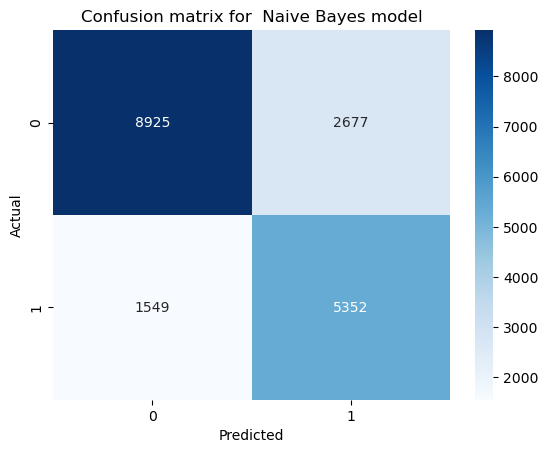

In [50]:
# Create a confusion matrix
# TRUE POSITIVE 1,1 - correctly identifying customers that will churn
# FALSE POSITIVE 0,1 - incorrectly identifying customers that will churn
# TRUE NEGATIVE 0,0 - correctly identifying customers that won't churn
# FALSE NEGATIVE 1,0 - incorrectly identifying customers that won't churn


lcm= confusion_matrix(y_test,y_pred)

#visualize the confusion matrix
sns.heatmap(lcm, annot= True, cmap= 'Blues', fmt= 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for  Naive Bayes model')
plt.show()

In [51]:
# Instantiate Logistic Regression model
log_reg = LogisticRegression()

# Train model
log_reg.fit(x_train, y_train)

LogisticRegression()

In [52]:
# Model Prediction file - Logistic Regression
log_pred = log_reg.predict(x_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Precision:", precision_score(y_test, log_pred))
print("Recall:", recall_score(y_test, log_pred))
print("F1-score:", f1_score(y_test, log_pred))
print("AUC-ROC:", roc_auc_score(y_test, log_pred))

Logistic Regression
Accuracy: 0.7986272496351943
Precision: 0.7426257068622956
Recall: 0.7041008549485582
F1-score: 0.7228503421600714
AUC-ROC: 0.7794767332836223


#### Hyperparameter Optimization for Logistic Regression model

In [53]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Sample 10% of the data randomly
subset_data = scaled_df2.sample(frac=0.1, random_state=42)
dfm2 = df.sample(frac=0.1, random_state=42)
label3 = dfm2.pop('arrival_delays')


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(subset_data, label3, test_size=0.2, random_state=42)

# Define the logistic regression model
logreg_model = LogisticRegression()

# Define hyperparameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # regularization strength
    'penalty': ['l1', 'l2'],               # regularization type
    'solver': ['liblinear']                # algorithm to use for optimization
}

# Create GridSearchCV object
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search on the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set using the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on Test Set:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Test Set: 0.799491974274442

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     11602
           1       0.74      0.70      0.72      6901

    accuracy                           0.80     18503
   macro avg       0.79      0.78      0.78     18503
weighted avg       0.80      0.80      0.80     18503



#### Confusion matrix for Logistic Regression model

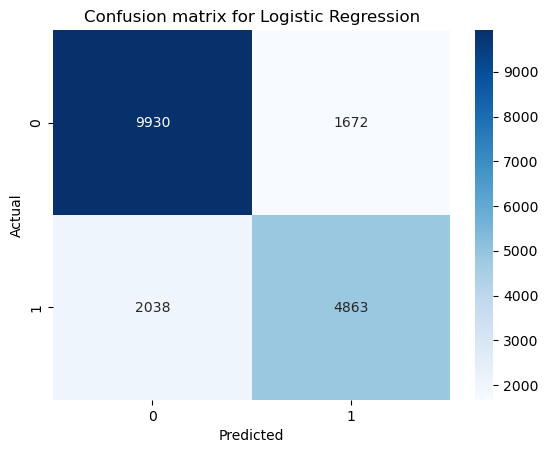

In [54]:
# Create a confusion matrix
# TRUE POSITIVE 1,1 - correctly identifying customers that will churn
# FALSE POSITIVE 0,1 - incorrectly identifying customers that will churn
# TRUE NEGATIVE 0,0 - correctly identifying customers that won't churn
# FALSE NEGATIVE 1,0 - incorrectly identifying customers that won't churn


lcm= confusion_matrix(y_test,y_pred)

#visualize the confusion matrix
sns.heatmap(lcm, annot= True, cmap= 'Blues', fmt= 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

### Conclusion

**Departure Delay:**
- The **Naive Bayes and Logistic Regression model** perfromed poorly in predicting departure delays because the data available wasn't sufficient enough to train the model. Columns containing important informations like flight cancelation reasons, Air System delay, Security delay, Airline delay, Late aircraft delay, and most importantly Weather delay had a lot of missing values and were considered unfit for the analysis.

**Arrival Delay:**

- The **Naive Bayes and Logistic Regression model** were the best performing models after being optimized with a general accuracy of 78% and 80% respectively
- However **Naive Bayes model** will be chosen as the overall best model in this scenario because it performed best on Recall score predicting low false negatives and high true positives as a high number of false negatives will hinder airport operational efficiencies and lead to misinformation of passengers.

### Productionize

In [55]:
import joblib

filename = "./nb_model.pkl"
joblib.dump(nb_model, filename)

['./nb_model.pkl']